## 이번 실습 목표
1. 유튜브 API key 발급하기
2. 유튜브 API 사용하기
3. 유튜브 정보 활용하기

++ 배웠던 내용을 활용한 유튜브 댓글 분석 프로젝트로 마무리

API란? (Application Programming Interface, 응용 프로그램 프로그래밍 인터페이스)

서비스를 제공하는 제공자와 제공된 서비스를 사용하는 제공자 간의 통신을 돕는 인터페이스

![](https://i.imgur.com/GjZMfdJ.png)

개발자의 API사용방식

1. 개발자는 서비스 제공자가 제공하는 서비스 중 자신이 원하는 서비스를 요청한다.
2. 서비스 제공자는 개발자가 요청한 정보를 받은 후 해당하는 정보를 개발자에게 전송합니다.
3. 개발자는 서비스 제공자로부터 응답받은 데이터를 활용해 프로그램을 개발합니다.

Youtube API란?

사용자인 개발자는 Youtube 관련 정보를 요청하고 Youtube 서비스 제공자는 사용자가 원하는 Youtube 관련 정보를 응답하며 서로 간의 통신을 담당하는 인터페이스  



### 유튜브 API key 발급

#### 구글 클라우드 프로젝트 생성

[구글 클라우드 프로젝트 생성 페이지](https://console.cloud.google.com/home/dashboard?project=precise-bank-322012)

####  Youtube data v3 api 신청하여 API key를 복사
   Youtube data v3 api 
   - 유튜브 동영상들에 대한 조회수, 추천/비추천 갯수, 댓글 갯수 등의 정보 제공
   - 하루에 10000크레딧 사용가능 가능하고 읽기 1, 쓰기 50, 업로드는 1600이 차감됨

In [4]:
! pip install --upgrade google-api-python-client

  Using cached google_api_python_client-2.30.0-py2.py3-none-any.whl (7.8 MB)
  Using cached httplib2-0.20.2-py3-none-any.whl (96 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)
  Using cached google_auth_httplib2-0.1.0-py2.py3-none-any.whl (9.3 kB)
  Using cached google_api_core-2.2.2-py2.py3-none-any.whl (95 kB)
  Using cached googleapis_common_protos-1.53.0-py2.py3-none-any.whl (198 kB)


You should consider upgrading via the 'c:\users\test\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


### 유튜브 API 사용하기

In [5]:
from googleapiclient.discovery import build

#### JSON 이란?
- 구조화된 데이터를 표현하기 위한 문자 기반의 표준 포맷
- 서비스 제공자는 사용자가 API를 사용해 요청한 정보를 Json포맷으로 전송한다. 
- 딕셔너리의 키값을 통한 접근방식과 리스트의 인덱싱을 통한 접근방식을 활용한 특정 정보에 접근 가능
- 여러 중첩된 {},[] 사용이 가능합니다.


In [6]:
tmp1 = {"name": "식빵","age": 15} 
tmp2 = {"address": ["서울시","용산구","청파로"]}
tmp3 = {"name": "식빵", "friend": {"name": "잼","age": 14 } }

print(tmp1["name"])
print(tmp2["address"][0])
print(tmp3["friend"]["age"])

식빵
서울시
14


#### 유튜브 동영상 검색

Youtube data v3 api 사용법
1. build를 사용해서 유튜브 api를 생성해서 youtube라는 변수에 저장해서 사용
2. youtube.search().list(사용자가 원하는 동영상에 대한 정보).execute() 사용해서 유튜브 서비스 제공자에게 원하는 동영상 데이터에 대한 정보 요청
3. 유튜브 서비스 제공자는 api로부터 받은 사용자의 요청을 바탕으로 해당하는 유튜브 동영상의 정보를 json포맷 형태로 응답 
4. 사용자는 json포맷으로 온 정보를 해석해서 사용한다.

[관련 레퍼런스 문서](https://developers.google.cn/youtube/v3/docs/search/list?hl=ko)

##### part = "id"로 하는 경우

In [7]:
API_KEY = "API KEY"#발급받은 API키를 넣어줍니다.
youtube = build("youtube", "v3", developerKey=API_KEY)
search_response = youtube.search().list(
        q= "강아지", #동영상 검색 키워드
        part="id", #요청하는 정보의 종류(id나 snippet 중 선택)
        maxResults=1, #최대 요청하는 정보의 갯수
        type = "video" #반환되는 정보의 타입(채널 정보,재생목록 정보,영상 정보)
).execute()
print(search_response)

{'kind': 'youtube#searchListResponse', 'etag': 'va11Iv17VTcJ8bBLHmR_Z_QjicI', 'nextPageToken': 'CAEQAA', 'regionCode': 'KR', 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 1}, 'items': [{'kind': 'youtube#searchResult', 'etag': 'bWr2v2h51x9TsQcYkuQIJARpjSk', 'id': {'kind': 'youtube#video', 'videoId': 'rYavP-vGzVo'}}]}


In [8]:
search_response["items"]
print(search_response["items"])

[{'kind': 'youtube#searchResult', 'etag': 'bWr2v2h51x9TsQcYkuQIJARpjSk', 'id': {'kind': 'youtube#video', 'videoId': 'rYavP-vGzVo'}}]


videoId
- 유튜브 동영상에 대한 고유한 명칭
- 모든 유튜브 동영상은 하나의 고유한 videoId를 가지고 있음
- 유튜브 api에서 특정 동영상의 댓글이나 통계 정보를 요청할 때 지정하는 유튜브 동영상 정보

In [9]:
youtube = build("youtube", "v3", developerKey=API_KEY)
search_response = youtube.search().list(
        q= "강아지", #동영상 검색 키워드
        part="id", #요청하는 정보의 종류(id나 snippet 중 선택)
        maxResults=10, #최대 요청하는 정보의 갯수
        type = "video" #반환되는 정보의 타입(채널 정보,재생목록 정보,영상 정보)
).execute()
print(search_response)

{'kind': 'youtube#searchListResponse', 'etag': 'Q1kE3gYQFesEuhz3OKaNifq2WjE', 'nextPageToken': 'CAoQAA', 'regionCode': 'KR', 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 10}, 'items': [{'kind': 'youtube#searchResult', 'etag': 'bWr2v2h51x9TsQcYkuQIJARpjSk', 'id': {'kind': 'youtube#video', 'videoId': 'rYavP-vGzVo'}}, {'kind': 'youtube#searchResult', 'etag': 'WFrLvn1ZbORJ4NBa_j48TO0U_fA', 'id': {'kind': 'youtube#video', 'videoId': 'Hooq1zQ11VU'}}, {'kind': 'youtube#searchResult', 'etag': 'BKWZNTkew5KYP0O0i4guyJoE3vU', 'id': {'kind': 'youtube#video', 'videoId': 'T5kV7WP6PN0'}}, {'kind': 'youtube#searchResult', 'etag': 'P-7vN0AvzCD23UXCr-cm00BXjTk', 'id': {'kind': 'youtube#video', 'videoId': 'o23c8SKgdR4'}}, {'kind': 'youtube#searchResult', 'etag': 'x9JVWbfvIrYPijNKWUE8POF_1Ok', 'id': {'kind': 'youtube#video', 'videoId': 'DLLy90Vlem4'}}, {'kind': 'youtube#searchResult', 'etag': 'kA3p7jde9-X1pc6f0Ed9aT7BUuM', 'id': {'kind': 'youtube#video', 'videoId': 'Gisn6exlbmk'}}, {'kind': 'yo

In [10]:
print(search_response["items"])

[{'kind': 'youtube#searchResult', 'etag': 'bWr2v2h51x9TsQcYkuQIJARpjSk', 'id': {'kind': 'youtube#video', 'videoId': 'rYavP-vGzVo'}}, {'kind': 'youtube#searchResult', 'etag': 'WFrLvn1ZbORJ4NBa_j48TO0U_fA', 'id': {'kind': 'youtube#video', 'videoId': 'Hooq1zQ11VU'}}, {'kind': 'youtube#searchResult', 'etag': 'BKWZNTkew5KYP0O0i4guyJoE3vU', 'id': {'kind': 'youtube#video', 'videoId': 'T5kV7WP6PN0'}}, {'kind': 'youtube#searchResult', 'etag': 'P-7vN0AvzCD23UXCr-cm00BXjTk', 'id': {'kind': 'youtube#video', 'videoId': 'o23c8SKgdR4'}}, {'kind': 'youtube#searchResult', 'etag': 'x9JVWbfvIrYPijNKWUE8POF_1Ok', 'id': {'kind': 'youtube#video', 'videoId': 'DLLy90Vlem4'}}, {'kind': 'youtube#searchResult', 'etag': 'kA3p7jde9-X1pc6f0Ed9aT7BUuM', 'id': {'kind': 'youtube#video', 'videoId': 'Gisn6exlbmk'}}, {'kind': 'youtube#searchResult', 'etag': 'PBFwRN3dozcpd-qGzA77uMBiIY0', 'id': {'kind': 'youtube#video', 'videoId': 'r_Zm_HssPsk'}}, {'kind': 'youtube#searchResult', 'etag': 'P51CUmKHmaNo31GyKyFb41Ipee8', 'id

In [11]:
print(search_response["items"][0])
print(search_response["items"][1])

{'kind': 'youtube#searchResult', 'etag': 'bWr2v2h51x9TsQcYkuQIJARpjSk', 'id': {'kind': 'youtube#video', 'videoId': 'rYavP-vGzVo'}}
{'kind': 'youtube#searchResult', 'etag': 'WFrLvn1ZbORJ4NBa_j48TO0U_fA', 'id': {'kind': 'youtube#video', 'videoId': 'Hooq1zQ11VU'}}


In [12]:
items = search_response["items"]
for item in items:
    print(item)

{'kind': 'youtube#searchResult', 'etag': 'bWr2v2h51x9TsQcYkuQIJARpjSk', 'id': {'kind': 'youtube#video', 'videoId': 'rYavP-vGzVo'}}
{'kind': 'youtube#searchResult', 'etag': 'WFrLvn1ZbORJ4NBa_j48TO0U_fA', 'id': {'kind': 'youtube#video', 'videoId': 'Hooq1zQ11VU'}}
{'kind': 'youtube#searchResult', 'etag': 'BKWZNTkew5KYP0O0i4guyJoE3vU', 'id': {'kind': 'youtube#video', 'videoId': 'T5kV7WP6PN0'}}
{'kind': 'youtube#searchResult', 'etag': 'P-7vN0AvzCD23UXCr-cm00BXjTk', 'id': {'kind': 'youtube#video', 'videoId': 'o23c8SKgdR4'}}
{'kind': 'youtube#searchResult', 'etag': 'x9JVWbfvIrYPijNKWUE8POF_1Ok', 'id': {'kind': 'youtube#video', 'videoId': 'DLLy90Vlem4'}}
{'kind': 'youtube#searchResult', 'etag': 'kA3p7jde9-X1pc6f0Ed9aT7BUuM', 'id': {'kind': 'youtube#video', 'videoId': 'Gisn6exlbmk'}}
{'kind': 'youtube#searchResult', 'etag': 'PBFwRN3dozcpd-qGzA77uMBiIY0', 'id': {'kind': 'youtube#video', 'videoId': 'r_Zm_HssPsk'}}
{'kind': 'youtube#searchResult', 'etag': 'P51CUmKHmaNo31GyKyFb41Ipee8', 'id': {'kin

##### part = "snippet"으로 하는 경우

In [13]:
youtube = build("youtube", "v3", developerKey=API_KEY)
search_response = youtube.search().list(
        q= "강아지",
        part="snippet",
        maxResults=1,
        type = "video"
).execute()
search_response["items"][0]

{'kind': 'youtube#searchResult',
 'etag': 'fYXYIYB4zTdo1BxnolVJz1gaE4U',
 'id': {'kind': 'youtube#video', 'videoId': 'rYavP-vGzVo'},
 'snippet': {'publishedAt': '2021-11-14T09:00:21Z',
  'channelId': 'UCnnwNnVjlCOKFJHIMG60kqg',
  'title': '할아버지 할머니가 강아지를 이뻐할 수 밖에 없는 이유ㅋㅋㅋ',
  'description': '할머니네집에 간 콜라♥️ 일정이 있어 콜라를 하루 맡겼는데 감사하게도 직접 핸드폰으로 촬영을 해주셨어요ㅜㅜ 할머니 할아버지에게 사랑을 듬뿍 받는 콜라의 모습 ...',
  'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/rYavP-vGzVo/default.jpg',
    'width': 120,
    'height': 90},
   'medium': {'url': 'https://i.ytimg.com/vi/rYavP-vGzVo/mqdefault.jpg',
    'width': 320,
    'height': 180},
   'high': {'url': 'https://i.ytimg.com/vi/rYavP-vGzVo/hqdefault.jpg',
    'width': 480,
    'height': 360}},
  'channelTitle': '슈퍼콜라TV',
  'liveBroadcastContent': 'none',
  'publishTime': '2021-11-14T09:00:21Z'}}

In [14]:
youtube = build("youtube", "v3", developerKey=API_KEY)
search_response = youtube.search().list(
        q= "강아지",
        part="snippet",
        maxResults=10,
        type = "video"
).execute()

In [15]:
items = search_response["items"]
for item in items:
    print(item['snippet']['title'])

할아버지 할머니가 강아지를 이뻐할 수 밖에 없는 이유ㅋㅋㅋ
[TV 동물농장 레전드]  귀여움과 대야 모두 폭발♥  ‘풍산개 꼬물이 19마리!’ 풀버전 다시 보기 I TV동물농장 (Animal Farm) | SBS Story
떨리는 강아지 유치원 첫 등원 날 (꿀벌반 ㅋㅋ)
똑같은 옷을 입은 사람들 속에서 강아지는 주인을 찾을 수 있을까? ㅋㅋ | KBS 스펀지 070421 방송
강아지판 톰과 제리
3일 만에 집에온 주인 못나가게 막는 강아지
강아지를 투명 수영장에 빠뜨렸더니...
물을 좋아하는 강아지에게 물침대를 사줬더니ㅋㅋㅋ
[TV 동물농장 레전드]  새끼냥 11마리 + 강아지 5마리!? 멍냥 대가족! 풀버전 다시 보기 I TV동물농장 (Animal Farm) | SBS Story
포메라니안 강아지 1년 성장과정


#### 유튜브 동영상 댓글정보 수집

- youtube.search()가 아닌 youtube.commentThreads()를 사용해서 정보를 요청해야 합니다.
- 매개변수로 videoId가 필수로 들어가야 한다. 
- youtube.search()를 사용해 원하는 동영사의 id값을 얻은 다음, youtube.commentThreads()를 사용해서 원하는 동영상의 정보를 수집하는 방식으로 사용한다.

In [16]:
comment = youtube.commentThreads().list(
    part='snippet', 
    videoId='T5kV7WP6PN0', #원하는 동영상 
    maxResults=1,#가져올 최대 댓글 갯수
).execute()
comment["items"]

[{'kind': 'youtube#commentThread',
  'etag': 'Sk-zhGY37cQOI3o3BMQt6s4okDc',
  'id': 'UgwfGtnyjyYS6ZILYqx4AaABAg',
  'snippet': {'videoId': 'T5kV7WP6PN0',
   'topLevelComment': {'kind': 'youtube#comment',
    'etag': 'C5-ejhW7rqfuHCmjtlgdDPJ6nlA',
    'id': 'UgwfGtnyjyYS6ZILYqx4AaABAg',
    'snippet': {'videoId': 'T5kV7WP6PN0',
     'textDisplay': '코코아빠(제 친구ㅎ)가 일하는 곳이라 <br>놀러갈 겸 뚜비를 잠시 맡겨 봤는데 <br>친구들이랑은 아직 좀 어색? 하지만 <br>나름 적응도 잘하고 잘 있었대용 ㅎㅎ<br>다음에는 친구들이랑 더 친해지러 가자~🤗<br><br>그럼 오늘도 재밌게 시청해 주세용~~<br><br>뚜비 인스타그램<br><a href="https://www.instagram.com/pom_ddubi/">https://www.instagram.com/pom_ddubi/</a><br><br>뚜비 보호자의 일상<br><a href="https://bit.ly/3aACvGc">https://bit.ly/3aACvGc</a>',
     'textOriginal': '코코아빠(제 친구ㅎ)가 일하는 곳이라 \n놀러갈 겸 뚜비를 잠시 맡겨 봤는데 \n친구들이랑은 아직 좀 어색? 하지만 \n나름 적응도 잘하고 잘 있었대용 ㅎㅎ\n다음에는 친구들이랑 더 친해지러 가자~🤗\n\n그럼 오늘도 재밌게 시청해 주세용~~\n\n뚜비 인스타그램\nhttps://www.instagram.com/pom_ddubi/\n\n뚜비 보호자의 일상\nhttps://bit.ly/3aACvGc',
     'authorDisplayName': '뚜비TV',
     'authorProfileImageUrl': 

In [17]:
comment["items"][0]['snippet']['topLevelComment']['snippet']['textOriginal']

'코코아빠(제 친구ㅎ)가 일하는 곳이라 \n놀러갈 겸 뚜비를 잠시 맡겨 봤는데 \n친구들이랑은 아직 좀 어색? 하지만 \n나름 적응도 잘하고 잘 있었대용 ㅎㅎ\n다음에는 친구들이랑 더 친해지러 가자~🤗\n\n그럼 오늘도 재밌게 시청해 주세용~~\n\n뚜비 인스타그램\nhttps://www.instagram.com/pom_ddubi/\n\n뚜비 보호자의 일상\nhttps://bit.ly/3aACvGc'

In [18]:
comment = youtube.commentThreads().list(
    part='snippet', 
    videoId='T5kV7WP6PN0', 
    maxResults=5,
).execute()

In [19]:
comments = comment["items"]
for comment in comments:
    print(comment['snippet']['topLevelComment']['snippet']['textOriginal'])

코코아빠(제 친구ㅎ)가 일하는 곳이라 
놀러갈 겸 뚜비를 잠시 맡겨 봤는데 
친구들이랑은 아직 좀 어색? 하지만 
나름 적응도 잘하고 잘 있었대용 ㅎㅎ
다음에는 친구들이랑 더 친해지러 가자~🤗

그럼 오늘도 재밌게 시청해 주세용~~

뚜비 인스타그램
https://www.instagram.com/pom_ddubi/

뚜비 보호자의 일상
https://bit.ly/3aACvGc
진짜 채널주인이 집사를 무척좋아하는듯
이모는 뚜비가  넘이뽀  ㅉㅉ ㅋ
뚭이,, 너무 귀여워❤️
하 정말..너무 이쁘다...


### 유튜브 정보 활용하기

원하는 검색키워드를 통해 얻은 비디오ID 리스트를 반환하는 함수를 만들어보자

In [20]:
def 동영상ID리스트가져오기(검색키워드,최대검색량):
    API_KEY = "API KEY"
    youtube = build("youtube", "v3", developerKey=API_KEY)
    search_response = youtube.search().list(
        q= 검색키워드,
        part="id",
        maxResults=최대검색량,
        type = "video"
    ).execute()
    items = search_response["items"]
    id_list = []
    for item in items:
        id_list.append(item['id']['videoId'])
    return id_list

In [21]:
print(동영상ID리스트가져오기("스우파",10))

['db2yWZrT96w', 'vWHBsyMSgLU', 'E3LRMaX-Mjc', '7aGLp01fkLo', 'G6yFO-LGwbI', 'w7PSN5aK488', 'hUzoAfqN-KU', 'q6qQbLqw3dQ', 'hFzmA3OSz0g', 'aol0GOcMF0E']


비디오 ID로부터 댓글 목록을 가져오는 함수를 작성해보자

In [22]:
def 동영상댓글정보추출하기(비디오ID,최대댓글갯수):
    API_KEY = "API KEY"
    youtube = build("youtube", "v3", developerKey=API_KEY)
    comment = youtube.commentThreads().list(
        part='snippet', 
        videoId= 비디오ID,
        maxResults=최대댓글갯수,
    ).execute()
    comments = comment["items"]
    comment_list = []
    for comment in comments:
        comment_list.append(comment['snippet']['topLevelComment']['snippet']['textOriginal'])
    return comment_list

In [23]:
print(동영상댓글정보추출하기("X9uzbrX-o8s",10))

['킬힐신고 춤추네ㅜ모니카 대박', '모니카 지 성질부린 걸 마치 프로그램 위한 것처럼 포장하는 걸로 밖에 안 보이네. 잘 받아넘겨준 제트썬한테나 고맙게 생각해라. 아니었음 1회부터 통편집됐을지도....\n\n예의있게 간지나는 게 더 고수아님?? 어그로 끄는 노이즈마케팅이 제일 저급한 하수짓인데. 오히려 모니카 저질스런 어그로 유연하게 받고 싫은티 하나 안 내고 깔끔하게 끝낸 제트썬 때문에 방송이 산거로 보임. 진짜 명품배틀은 피넛이랑 립제이처럼 어그로없이 매너로 실력으로 존중으로 보여주는 거고 그것도 충분히 이슈가 됐음.', '윤정쌤 넘나 스-윗', '모니카가 방방봐 배틀 하고 나니까 뒷 배틀들도 일반인들이 보기에 솔직히 재밌는 요소들도 이전 배틀보다 많이 나왔던 거 같음\n나중에 배틀예의 알고 보니 눈쌀 찌뿌려지긴 했지만 이건 알고 봤을 때고,, 방송 화제성을 위해서 했던 거라면 완전 먹혔다고 봄..', '근데 남자들끼리 저거하면 ㄹㅇ 그자리에사 싸움남\n감정 격앙된 상태에서 몸에 터치까짐 괜찮은데\n머리가 건드려지는 순간 ㄹㅇ 주먹다짐 시작되는거', '모니카가 참 속이깊은 사람이었네~~감동하고 갑니다', '안영미 드립 개좋앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ가슴에 장관상 있는거 침 흘리면서 봤네', '모니카의 춤 마치 환웅 옆의 오골계', '님들 혹시 모니까님 배우 강하늘님 닮지 않았어요?', 'ahn youngmi is so pretty\n6:12 🤣🤣🤣']


In [24]:
def 영상댓글수집(키워드,최대댓글갯수):
    id_list = 동영상ID리스트가져오기(키워드,1)
    전체댓글목록 = []
    for id in id_list:
        댓글목록 = 동영상댓글정보추출하기(id,최대댓글갯수)
        for 댓글 in 댓글목록:
            전체댓글목록.append(댓글) 
    return 전체댓글목록

In [25]:
결과1 = 영상댓글수집('스우파',10)
결과1

['여성 댄서들의 자존심을 건 생존 경쟁 리얼리티 서바이벌🔥[#스트릿우먼파이터] 더 보러가기\r\n→https://youtube.com/playlist?list=PLqGVA3Cdr7gyMGMQEISObBctFx5f5AQ00',
 '스텝업 영화의 한장면을 보는것같아요!',
 '저 남자거든요 근데 와 이무대 보니까 진짜 언니란 소리가 절로 나옴니다 다들 너무 멋지고 화려해요 진짜 리스펙!!!',
 '허니제이님 정말 독보적인듯 동작이 깔끔하고 군더더기가 없네 흔들림이 없이 멈출때 딱 멈춰줌 깔끔스',
 '뽀대가',
 '댄스영상으로도 눈물을 흘리게 될줄이야 ㅠㅠ\n모든 댄서분들 다 멋지고 아름답고 최고십니다!',
 '훅 카레이서 착장…. 오닥후 마음을 울리네요…',
 '홀리뱅은 리더님 역량도 뛰어나지만 이런 무대 구성이 굉장히 고퀄인 느낌 ㅎㅎㅎㅎ 언니 사랑해요 ㅎㅎㅎㅎ\n근데 라치카 무대도 넘 좋았음 라치카는 멤버 한 명 한 명 다 인기 있지 않음? 다 정감 가는 귀여운 소녀들같아 ㅎㅎㅎ\n라치카 다 잘 춰 진짜 ㄷㄷㄷㄷ',
 '허니제이😚👍💕',
 '너~~~무멋있엉ㅜ']

## 최종 실습
1. 유튜브 영상 댓글 워드클라우드 시각화(1,2번째 실습에서 배운 개념을 활용)
2. 유튜브 영상 댓글 감성분석하기(1,2,3번째 실습에서 배운 개념을 활용)

### 유튜브 영상 댓글 워드클라우드 형태로 시각화하기

In [26]:
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
from konlpy.tag import Okt
from nltk import Text
okt = Okt()
matplotlib.rcParams["font.family"] = "NanumGothic"
폰트위치 = 'C:/Windows/Fonts/NanumGothic.ttf'

In [27]:
def 영상댓글수집(키워드,최대댓글갯수):
    id_list = 동영상ID리스트가져오기(키워드,1)
    전체댓글목록 = []
    for id in id_list:
        댓글목록 = 동영상댓글정보추출하기(id,최대댓글갯수)
        for 댓글 in 댓글목록:
            전체댓글목록.append(댓글) 
    return 전체댓글목록

In [28]:
def 명사구름만들기(text,color):
    명사목록 = Text(okt.nouns(text))
    명사구름 = WordCloud(font_path = 폰트위치,background_color='white',colormap = color).generate_from_frequencies(명사목록.vocab())
    plt.figure(figsize=(12,12))
    plt.imshow(명사구름)
    plt.axis("off")
    plt.show()

댓글들을 이어서 하나의 변수에 저장합니다.

In [29]:
결과 = 영상댓글수집("스우파",100)
댓글텍스트 = ""
for tmp1 in 결과:
    댓글텍스트 += tmp1
    댓글텍스트 += " "
댓글텍스트

'여성 댄서들의 자존심을 건 생존 경쟁 리얼리티 서바이벌🔥[#스트릿우먼파이터] 더 보러가기\r\n→https://youtube.com/playlist?list=PLqGVA3Cdr7gyMGMQEISObBctFx5f5AQ00 스텝업 영화의 한장면을 보는것같아요! 저 남자거든요 근데 와 이무대 보니까 진짜 언니란 소리가 절로 나옴니다 다들 너무 멋지고 화려해요 진짜 리스펙!!! 허니제이님 정말 독보적인듯 동작이 깔끔하고 군더더기가 없네 흔들림이 없이 멈출때 딱 멈춰줌 깔끔스 뽀대가 댄스영상으로도 눈물을 흘리게 될줄이야 ㅠㅠ\n모든 댄서분들 다 멋지고 아름답고 최고십니다! 훅 카레이서 착장…. 오닥후 마음을 울리네요… 홀리뱅은 리더님 역량도 뛰어나지만 이런 무대 구성이 굉장히 고퀄인 느낌 ㅎㅎㅎㅎ 언니 사랑해요 ㅎㅎㅎㅎ\n근데 라치카 무대도 넘 좋았음 라치카는 멤버 한 명 한 명 다 인기 있지 않음? 다 정감 가는 귀여운 소녀들같아 ㅎㅎㅎ\n라치카 다 잘 춰 진짜 ㄷㄷㄷㄷ 허니제이😚👍💕 너~~~무멋있엉ㅜ 솔직히 잘추는 지 모르겠다 아이돌무대보면 확실히 거대자본과 그업계최고실력파 기획자들이 만들어놓은 무대와 오랜연습시간동안 만들어진 춤이랑 단기간 구성된 토너먼트 형태에서 만들어진 춤의 완성도가 아예 다름. 보아눈에는 어찌보였을지모르겠네 아이키 진짜 머리좋고 아이디어가 넘치는듯... 어떻게 수화,엄마를 연결해서 춤을 짠것도 그렇고 어딜가든 엄마 서사는 먹히니까... 진짜 대단하다 아이키👍🏻👍🏻 진짜 취향 문제지 빠지는 퍼포가 하나도 없구나 개쩐다 엠넷이 딱 하나 잘한 거 캐스팅.. 능력 좋고 끼 좋은 업계 탑 사람들 모아놓으니 스케줄이나 진행이나 무대가 구려도 커버를 넘어서 훌륭히 소화함 훅 무대 보고울었다 ㅠㅜㅜ수화를 넣으니\n넘 감동.. 아니 신나게 보다가 훅 엄마가 머리만져주자마자 오열하잖아 ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 스우파 그냥 전원일기처럼 계속 해줘라… 모든 무대가 다 소름이다\n황금라치카 개인적으로 미쳤고 너무 좋음 밝은 에너지가..\n코카 리헤이 특유 

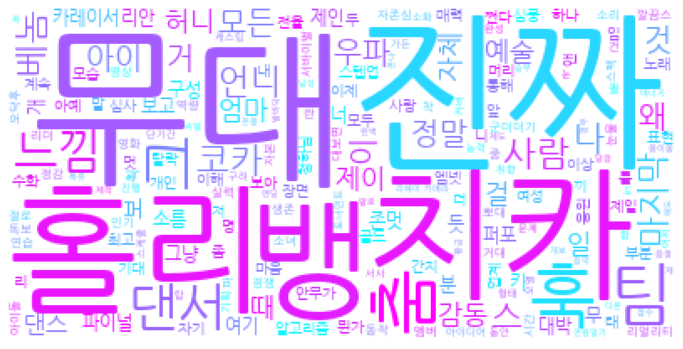

In [30]:
명사구름만들기(댓글텍스트,'cool_r')

In [118]:
def 영상댓글워드클라우드(키워드,최대댓글갯수,color):
    결과 = 영상댓글수집(키워드,최대댓글갯수)
    댓글텍스트 = ""
    for tmp1 in 결과:
        댓글텍스트 += tmp1
        댓글텍스트 += " "
    명사구름만들기(댓글텍스트,color)

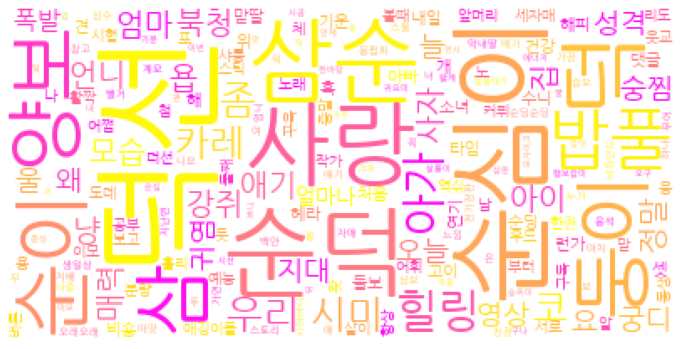

In [120]:
영상댓글워드클라우드("강아지",100,'spring')

### 유튜브 영상 댓글 감성분석하기

감성분석 모델을 사용하기 위해 필요한 것 
1. 문장 벡터화에 사용할 주요 1000개의 토큰 정보
2. 미리 학습된 감성분석 모델

In [37]:
# 모델 불러오기
from keras.models import load_model
import pandas as pd
import numpy as np

model = load_model('movie_review_model.h5')
selected_tokens = pd.read_csv("다빈 토큰.csv")

selected_words = []
for row in range(len(selected_tokens)):
    token = selected_tokens["토큰"][row]
    selected_words.append(token)  

In [38]:
def predict_review(review): #감성분석
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        return "긍정"
    else:
        return "부정"

In [39]:
def tokenize(doc):#토크나이징함수
    #형태소와 해당하는 품사를 join
    answer = [] 
    tokens_list= okt.pos(doc)
    for tk in tokens_list:
        #tk => ("흔들리다","Verb") => "흔들리다/Verb"
        element = '/'.join(tk)
        answer.append(element) 
    return answer

In [40]:
def term_frequency(tokens):#문장의 벡터화 함수
    answer = []
    for famous_token in selected_words:
        answer.append(tokens.count(famous_token))
    return answer 

In [41]:
영상댓글 = 영상댓글수집("깡",30)

In [42]:
df = pd.DataFrame({'댓글' : 영상댓글})
df["감성분석"] = ""
for row in range(len(df)):
    댓글 = df["댓글"][row]
    df["감성분석"][row] = predict_review(댓글)
df

,댓글,감성분석
0,무용 수행평가에서 창작 안무 짜야되는데 못짜겠어서 좀 빌리겠습니다 감사합니다,부정
1,안녕하십니까\n당신도 나말고 지금 보는 사람 있나 보고있죠?,부정
2,오랜만에 깡이다,긍정
3,깡 4주년 기념식이 곧 예정이옵니다.,부정
4,마 내는 광기에 사로잡혀 오늘도 보러 들어왔다....,긍정
5,하늘다람쥐,긍정
6,지금보는 사람은 진짜 없다,긍정
7,"""꽁기깅깡꽁기깅깅깡꽁기깅강공깡""",부정
8,"""구려""",부정
9,깡좌 아직도 살아있네ㅋㅋㅋㅋ,긍정


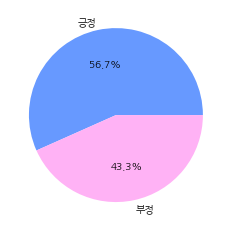

In [43]:
sentiment = [len(df[df["감성분석"]=="긍정"]),len(df[df["감성분석"]=="부정"])]
sentiment_label = ["긍정","부정"]
color =['#6799FF','#FFB2F5']
plt.pie(sentiment,labels=sentiment_label,colors=color,autopct='%.1f%%')
plt.show()

In [44]:
df.to_csv("유튜브 댓글 감성분석.csv",index=False)

[글자색상 팔레트](https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%83%89%EC%83%81+%ED%8C%94%EB%A0%88%ED%8A%B8&oquery=%EC%83%89%EA%B9%94+%ED%8C%94%EB%A0%88%ED%8A%B8&tqi=hUwdKsp0YihssCd%2FulGssssstXR-417767)

### 유튜브 댓글 분석 함수 작성

In [45]:
def 유튜브댓글분석(검색키워드,최대댓글수):
    fig,ax=plt.subplots(nrows=1,ncols=2)#1X2형태의 그래프 시각화 영역 분할설정
    #1 검색키워드에 대한 최대 댓글수만큼의 댓글을 수집해서 이어 붙인 다음에 
    #그 이어붙인 텍스트를 바탕으로 워드클라우드 출력
    영상댓글 = 영상댓글수집(검색키워드,최대댓글수)
    댓글텍스트 = ""
    for tmp1 in 영상댓글:
        댓글텍스트 += tmp1
        댓글텍스트 += " "
    
    명사목록 = Text(okt.nouns(댓글텍스트))
    명사구름 = WordCloud(font_path = 폰트위치,background_color='white',colormap = 'seismic').generate_from_frequencies(명사목록.vocab())
    plt.subplot(121)#1X2 구조에서 1번째 구역에 대한 그래프 출력 지정 명령어
    plt.axis("off")#그래프 축 표시 X
    plt.imshow(명사구름)
     
    #2 수집한 영상 댓글에 대한 데이터프레임 생성 후 감성분석한 결과를 데이터프레임에 추가
    df = pd.DataFrame({'댓글' : 영상댓글})
    df["감성분석"] = ""
    for row in range(len(df)):
        댓글 = df["댓글"][row]
        df["감성분석"][row] = predict_review(댓글)
    
    #3 감성분석이 긍정인 경우와 부정인 경우에 대한 파이차트 출력
    sentiment = [len(df[df["감성분석"]=="긍정"]),len(df[df["감성분석"]=="부정"])]
    sentiment_label = ["긍정","부정"]
    color =['#6B66FF','#FFB2F5']
    plt.subplot(122)#1X2 구조에서 2번째 구역에 대한 그래프 출력 지정 명령어
    plt.pie(sentiment,labels=sentiment_label,colors=color,autopct='%.1f%%')
    plt.savefig("유튜브댓글분석.png")
    plt.show()

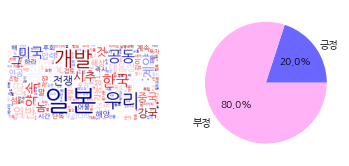

In [48]:
유튜브댓글분석("7광구",30)   